In [1]:
from scipy.integrate import quad
%matplotlib inline

In [2]:
import numpy as np
import math
import pylab
from scipy import optimize

Простая формула трапеций:
$$\int_{a}^{b} f(x) dx \approx \frac{(b-a)}{2} \left (f(a)+f(b)\right)$$
Составная формула трапеций:
$h = \frac{b-a}{N}$
$$\int_{a}^{b} f(x) dx \approx \frac{h}{2}\left(f_0 +2(f_1 + f_2 + ... + f_{N-1}) + f_{N}\right)$$
Порядок точности:
Аналитический порядок точности равен единице, так как на каждом интервале метод приближает функцию линейной.

In [47]:
def Integrate(x, f, a, b):
    x = x[a <= x]
    x = x[x <= b]
    sum_int = f[0]+f[-1]+2*sum(f[1:-1])
    return float(sum_int*(x[1]-x[0])/2)

In [48]:
def func(x):
    return x**3

def func2(x):
    return x**(-1/2)

def func3(x):
    return x**(3)*math.cos(100*x)

def test():
    n = 20
    ro_w_x = np.linspace(1, 2, n)
    ro_w_y = np.array([func(i) for i in ro_w_x])
    U_y = Integrate(ro_w_x, ro_w_y, 1, 2)
    print("x^3", np.abs(U_y - quad(func, 1, 2)[0]))
    
    ro_w_x = np.linspace(0.01, 1, n)
    ro_w_y = np.array([func2(i) for i in ro_w_x])
    U_y = Integrate(ro_w_x, ro_w_y, 0, 1)
    print("x^(-1/2)", np.abs(U_y-2))
    
    ro_w_x = np.linspace(0, 1, n)
    ro_w_y = np.array([func(i) for i in ro_w_x])
    U_y = Integrate(ro_w_x, ro_w_y, 0, 1)
    print("x^3*cos(100x)", np.abs(U_y - quad(func3, 0, 1)[0]))


In [49]:
test()

x^3 0.00207756232686
x^(-1/2) 0.126420034515
x^3*cos(100x) 0.25549443507


На разрывных и осциллирующих примерах метод довольно сильно ошибается, что неудивительно.

In [50]:
def linear_fit(x, a, b):
    return a * x + b

def get_er(n):
    n_array = [i*10 for i in range(1, n+1)]
    n_log_array = [math.log(i*10) for i in n_array]
    er_array = []
    for n in n_array:
        ro_w_x = np.linspace(0, 1, n)
        ro_w_y = np.array([func(i) for i in ro_w_x])
        er_array.append(math.log(np.abs(Integrate(ro_w_x, ro_w_y,  0, 1)-0.25)))
    pylab.plot (n_log_array, er_array)
    pylab.show()
    fit_a, fit_b = optimize.curve_fit(linear_fit, n_log_array, er_array)[0]
    return fit_a, fit_b

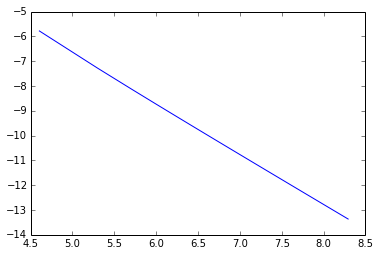

-k -2.03507095996
C 3.49892910372


In [51]:
a, b = get_er(40)
print("-k", a)
print("C", b)

Полученный порядок аппроксимации примерно 2, а оценка константы -- примерно 3.5.

$ E(h) \le 3.5 h^2$